In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

import os
import requests
import credentials
import yfinance as yf

import requests
from bs4 import BeautifulSoup

import statsmodels.api as sm
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.linear_model import LinearRegression

# Data

# FFR

In [14]:
import os
import requests
import credentials


url = 'https://api.stlouisfed.org/fred/series/observations?series_id=EFFR&api_key=' + credentials.apikey + '&file_type=json'
response = requests.get(url)

data = response.json()
ffr = pd.DataFrame(data['observations'])

# cleanup
ffr = ffr[ffr.date > '2022-04-06']
ffr = ffr [['date', 'value']]
ffr = ffr.rename(columns = {'value': 'DFF', 'date': 'Date'})
ffr = ffr.reset_index(drop = True)
ffr.DFF = pd.to_numeric(ffr.DFF.str.replace(".", ""), errors='coerce')


# FFR Futures

In [15]:
# URL to scrape
url = 'https://www.cmegroup.com/markets/interest-rates/cme-fedwatch-tool.html'

In [16]:
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.keys import Keys
from selenium.common.exceptions import TimeoutException
from selenium.webdriver.common.action_chains import ActionChains
from selenium import webdriver
import time

driver = webdriver.Chrome(executable_path='C:/temp/chromedriver.exe')
driver.set_page_load_timeout(300)

driver.get("https://www.cmegroup.com/trading/interest-rates/countdown-to-fomc.html")

time.sleep(2)

driver.switch_to.frame(driver.find_element(By.TAG_NAME,"iframe"))
driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")

try:
    # Wait for up to 10 seconds before throwing a TimeoutException
    element = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.LINK_TEXT, "Downloads")))
    driver.execute_script("arguments[0].click();", element)
except TimeoutException:
    print("Timed out waiting for page to load")
driver.execute_script("arguments[0].click();", element)

time.sleep(2)

links = driver.find_elements(By.TAG_NAME, "a")

data = {}
for link in links:
    data[link.text] = link.get_attribute('href')
    
driver.quit()

Timed out waiting for page to load


NameError: name 'element' is not defined

In [21]:
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.keys import Keys
from selenium.common.exceptions import TimeoutException
from selenium.webdriver.common.action_chains import ActionChains
from selenium import webdriver
import time

driver = webdriver.Chrome(executable_path='C:/temp/chromedriver.exe')
driver.set_page_load_timeout(300)


driver.get("https://www.cmegroup.com/trading/interest-rates/countdown-to-fomc.html")

time.sleep(2)

iframes = driver.find_elements(By.TAG_NAME, "iframe")

# Switch to the iframe with the "Downloads" link
driver.switch_to.frame(iframes[1])

driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")

element = driver.find_element(By.LINK_TEXT, "Downloads")
driver.execute_script("arguments[0].click();", element)

time.sleep(2)

links = driver.find_elements(By.TAG_NAME, "a")

data = {}
for link in links:
    data[link.text] = link.get_attribute('href')

driver.quit()

In [22]:
data

{'': 'https://cmegroup-tools.quikstrike.net/User/QuikStrikeView.aspx?viewitemid=IntegratedFedWatchTool&userId=lwolf&jobRole=&company=&companyType=&userId=lwolf&jobRole=&company=&companyType=&insid=94809895&qsid=2860994e-6c97-4c2e-9a3f-c7d2334d62ec#',
 'Current': "javascript:__doPostBack('ctl00$MainContent$ucViewControl_IntegratedFedWatchTool$lbCurrent','')",
 'Compare': "javascript:__doPostBack('ctl00$MainContent$ucViewControl_IntegratedFedWatchTool$lbCompare','')",
 'Probabilities': "javascript:__doPostBack('ctl00$MainContent$ucViewControl_IntegratedFedWatchTool$lbPTree','')",
 'Historical': "javascript:__doPostBack('ctl00$MainContent$ucViewControl_IntegratedFedWatchTool$lbHistorical','')",
 'Downloads': "javascript:__doPostBack('ctl00$MainContent$ucViewControl_IntegratedFedWatchTool$lbDownloads','')",
 'Prior Hikes': "javascript:__doPostBack('ctl00$MainContent$ucViewControl_IntegratedFedWatchTool$lbMH','')",
 'Chart': "javascript:__doPostBack('ctl00$MainContent$ucViewControl_Integrat

In [23]:
reports = {}
for k,v in data.items():
    if '20' in k:
        reports[k] = v

In [24]:
dfs = {}
for key, url in reports.items():
    dfs[key] = pd.read_csv(url)
    dfs[key]['contract'] = key

In [25]:
for k,v in dfs.items():
    print(len(v))

175
209
239
251
251
251
251
251
206
206
167
108
108
42
12
0


In [26]:
len(dfs)

16

In [27]:
df = pd.concat([i for i in dfs.values()])

In [28]:
df.sort_values(by = 'Date', ascending = True)

Date  (0-25)  (25-50)  (50-75)  (75-100)  (100-125)  (125-150)  \
154  01/03/2023     0.0      0.0      0.0       0.0        0.0        0.0   
109  01/03/2023     0.0      0.0      0.0       0.0        0.0        0.0   
154  01/03/2023     NaN      NaN      NaN       NaN        NaN        NaN   
154  01/03/2023     NaN      NaN      0.0       0.0        0.0        0.0   
154  01/03/2023     0.0      0.0      0.0       0.0        0.0        0.0   
..          ...     ...      ...      ...       ...        ...        ...   
69   12/30/2022     0.0      0.0      0.0       0.0        0.0        0.0   
153  12/30/2022     NaN      NaN      NaN       NaN        NaN        NaN   
153  12/30/2022     0.0      0.0      0.0       0.0        0.0        0.0   
10   12/30/2022     0.0      0.0      0.0       0.0        0.0        0.0   
108  12/30/2022     0.0      0.0      0.0       0.0        0.0        0.0   

     (150-175)  (175-200)  (200-225)  ...  (1825-1850)  (1850-1875)  \
154        0.0        0.0        0.0  ...          NaN          NaN   
109        0.0        0.0        0.0  ...          NaN          NaN   
154        NaN        0.0        0.0  ...          NaN          NaN   
154        0.0        0.0        0.0  ...          NaN          NaN   
154        0.0        0.0        0.0  ...          NaN          NaN   
..         ...        ...        ...  ...          ...          ...   
69         0.0        0.0        0.0  ...          NaN          NaN   
153        NaN        0.0        0.0  ...          NaN          NaN   
153        0.0        0.0        0.0  ...          NaN          NaN   
10         0.0        0.0        0.0  ...          0.0          0.0   
108        0.0        0.0        0.0  ...          NaN          NaN   

     (1875-1900)  (1900-1925)  (1925-1950)  (1950-1975)  (1975-2000)  \
154          NaN          NaN          NaN          NaN          NaN   
109          NaN          NaN          NaN          NaN          NaN   
154          NaN          NaN          NaN          NaN          NaN   
154          NaN          NaN          NaN          NaN          NaN   
154          NaN          NaN          NaN          NaN          NaN   
..           ...          ...          ...          ...          ...   
69           NaN          NaN          NaN          NaN          NaN   
153          NaN          NaN          NaN          NaN          NaN   
153          NaN          NaN          NaN          NaN          NaN   
10           0.0          0.0          0.0          NaN          NaN   
108          NaN          NaN          NaN          NaN          NaN   

     (2000-2025)  (2025-2050)  (2050-2075)  
154          NaN          NaN          NaN  
109          NaN          NaN          NaN  
154          NaN          NaN          NaN  
154          NaN          NaN          NaN  
154          NaN          NaN          NaN  
..           ...          ...          ...  
69           NaN          NaN          NaN  
153          NaN          NaN          NaN  
153          NaN          NaN          NaN  
10           NaN          NaN          NaN  
108          NaN          NaN          NaN  

[2727 rows x 85 columns]

In [29]:
df = df[df['Date'].notna()]

In [30]:
rates = [i for i in df.columns if i != 'Date' and i != 'contract']

In [31]:
rateset = list(set(rates))

In [32]:
ratevals = []
for i in rates:
    a = i.replace('(', "").replace(")","").split('-')[0]
    if float(a) < 25:
        a = float(a) * 1000
    
    b = i.replace('(', "").replace(")","").split('-')[1]
    if float(b) < 25:
        b = float(b) * 1000

    val = (int(a) + int(b)) / 2
    ratevals.append(str(val))

In [33]:
rename = dict(zip(rates, ratevals))

In [34]:
ffr['Date'] =  pd.to_datetime(ffr['Date'], infer_datetime_format=True)
df['Date'] =  pd.to_datetime(df['Date'], infer_datetime_format=True)
df['contract'] =  pd.to_datetime(df['contract'], infer_datetime_format=True)

In [35]:
df.rename(columns = rename, inplace = True)

In [36]:
df.columns.sort_values()

Index(['1012.5', '1037.5', '1062.5', '1087.5', '1112.5', '112.5', '1137.5',
       '1162.5', '1187.5', '12.5', '1212.5', '1237.5', '1262.5', '1287.5',
       '1312.5', '1337.5', '1362.5', '137.5', '1387.5', '1412.5', '1437.5',
       '1462.5', '1487.5', '1512.5', '1537.5', '1562.5', '1587.5', '1612.5',
       '162.5', '1637.5', '1662.5', '1687.5', '1712.5', '1737.5', '1762.5',
       '1787.5', '1812.5', '1837.5', '1862.5', '187.5', '1887.5', '1912.5',
       '1937.5', '1962.5', '1987.5', '2012.5', '2037.5', '2062.5', '212.5',
       '237.5', '262.5', '287.5', '312.5', '337.5', '362.5', '37.5', '387.5',
       '412.5', '437.5', '462.5', '487.5', '512.5', '537.5', '562.5', '587.5',
       '612.5', '62.5', '637.5', '662.5', '687.5', '712.5', '737.5', '762.5',
       '787.5', '812.5', '837.5', '862.5', '87.5', '887.5', '912.5', '937.5',
       '962.5', '987.5', 'Date', 'contract'],
      dtype='object')

In [37]:
df = df.reindex(sorted(df.columns), axis=1)

In [38]:
df = df.join(ffr.set_index('Date'), on='Date')

In [39]:
df.sort_values(by = 'Date', ascending = True)

1012.5  1037.5  1062.5  1087.5  1112.5  112.5  1137.5  1162.5  1187.5  \
0       NaN     NaN     NaN     NaN     NaN    0.0     NaN     NaN     NaN   
0       0.0     0.0     0.0     0.0     NaN    0.0     NaN     NaN     NaN   
0       0.0     0.0     0.0     0.0     0.0    0.0     0.0     0.0     0.0   
0       0.0     0.0     0.0     0.0     0.0    0.0     0.0     0.0     0.0   
0       0.0     0.0     0.0     0.0     0.0    0.0     0.0     0.0     0.0   
..      ...     ...     ...     ...     ...    ...     ...     ...     ...   
250     NaN     NaN     NaN     NaN     NaN    NaN     NaN     NaN     NaN   
107     0.0     0.0     0.0     0.0     0.0    0.0     0.0     0.0     0.0   
250     NaN     NaN     NaN     NaN     NaN    NaN     NaN     NaN     NaN   
250     0.0     0.0     0.0     0.0     0.0    0.0     0.0     NaN     NaN   
11      0.0     0.0     0.0     0.0     0.0    0.0     0.0     0.0     0.0   

     12.5  ...  862.5  87.5  887.5  912.5  937.5  962.5  987.5       Date  \
0     0.0  ...    NaN   0.0    NaN    NaN    NaN    NaN    NaN 2022-05-23   
0     0.0  ...    0.0   0.0    0.0    0.0    0.0    0.0    0.0 2022-05-23   
0     0.0  ...    0.0   0.0    0.0    0.0    0.0    0.0    0.0 2022-05-23   
0     0.0  ...    0.0   0.0    0.0    0.0    0.0    0.0    0.0 2022-05-23   
0     0.0  ...    0.0   0.0    0.0    0.0    0.0    0.0    0.0 2022-05-23   
..    ...  ...    ...   ...    ...    ...    ...    ...    ...        ...   
250   NaN  ...    0.0   NaN    0.0    NaN    NaN    NaN    NaN 2023-05-19   
107   0.0  ...    0.0   0.0    0.0    0.0    0.0    0.0    0.0 2023-05-19   
250   NaN  ...    NaN   NaN    NaN    NaN    NaN    NaN    NaN 2023-05-19   
250   0.0  ...    0.0   0.0    0.0    0.0    0.0    0.0    0.0 2023-05-19   
11    0.0  ...    0.0   0.0    0.0    0.0    0.0    0.0    0.0 2023-05-19   

      contract    DFF  
0   2023-02-01   83.0  
0   2023-05-03   83.0  
0   2023-11-01   83.0  
0   2023-12-13   83.0  
0   2023-06-14   83.0  
..         ...    ...  
250 2023-09-20  508.0  
107 2024-07-31  508.0  
250 2023-07-26  508.0  
250 2023-12-13  508.0  
11  2024-11-06  508.0  

[2727 rows x 86 columns]

# BTC

In [40]:
from datetime import date

today = date.today().strftime("%Y-%m-%d")
print(today)

btc = yf.download('BTC-USD', start='2022-04-07', end=today)

2023-05-22
[*********************100%***********************]  1 of 1 completed


In [41]:
btc.drop(columns = [i for i in btc.columns if i != 'Open' and i!= 'Volume'], inplace = True)

In [42]:
btc.rename(columns = {'Open': 'btcopen', 'Volume':'btcvolume'}, inplace = True)

In [43]:
df

1012.5  1037.5  1062.5  1087.5  1112.5  112.5  1137.5  1162.5  1187.5  \
0      NaN     NaN     NaN     NaN     NaN    0.0     NaN     NaN     NaN   
1      NaN     NaN     NaN     NaN     NaN    0.0     NaN     NaN     NaN   
2      NaN     NaN     NaN     NaN     NaN    0.0     NaN     NaN     NaN   
3      NaN     NaN     NaN     NaN     NaN    0.0     NaN     NaN     NaN   
4      NaN     NaN     NaN     NaN     NaN    0.0     NaN     NaN     NaN   
..     ...     ...     ...     ...     ...    ...     ...     ...     ...   
7      0.0     0.0     0.0     0.0     0.0    0.0     0.0     0.0     0.0   
8      0.0     0.0     0.0     0.0     0.0    0.0     0.0     0.0     0.0   
9      0.0     0.0     0.0     0.0     0.0    0.0     0.0     0.0     0.0   
10     0.0     0.0     0.0     0.0     0.0    0.0     0.0     0.0     0.0   
11     0.0     0.0     0.0     0.0     0.0    0.0     0.0     0.0     0.0   

    12.5  ...  862.5  87.5  887.5  912.5  937.5  962.5  987.5       Date  \
0    0.0  ...    NaN   0.0    NaN    NaN    NaN    NaN    NaN 2022-05-23   
1    0.0  ...    NaN   0.0    NaN    NaN    NaN    NaN    NaN 2022-05-24   
2    0.0  ...    NaN   0.0    NaN    NaN    NaN    NaN    NaN 2022-05-25   
3    0.0  ...    NaN   0.0    NaN    NaN    NaN    NaN    NaN 2022-05-26   
4    0.0  ...    NaN   0.0    NaN    NaN    NaN    NaN    NaN 2022-05-27   
..   ...  ...    ...   ...    ...    ...    ...    ...    ...        ...   
7    0.0  ...    0.0   0.0    0.0    0.0    0.0    0.0    0.0 2023-05-15   
8    0.0  ...    0.0   0.0    0.0    0.0    0.0    0.0    0.0 2023-05-16   
9    0.0  ...    0.0   0.0    0.0    0.0    0.0    0.0    0.0 2023-05-17   
10   0.0  ...    0.0   0.0    0.0    0.0    0.0    0.0    0.0 2023-05-18   
11   0.0  ...    0.0   0.0    0.0    0.0    0.0    0.0    0.0 2023-05-19   

     contract    DFF  
0  2023-02-01   83.0  
1  2023-02-01   83.0  
2  2023-02-01   83.0  
3  2023-02-01   83.0  
4  2023-02-01   83.0  
..        ...    ...  
7  2024-11-06  508.0  
8  2024-11-06  508.0  
9  2024-11-06  508.0  
10 2024-11-06  508.0  
11 2024-11-06  508.0  

[2727 rows x 86 columns]

In [44]:
btc['Date'] =  pd.to_datetime(btc.index, infer_datetime_format=True)

In [45]:
df = df.join(btc.set_index('Date'), on='Date')

In [46]:
df[df.Date == '2023-03-07']

1012.5  1037.5  1062.5  1087.5  1112.5  112.5  1137.5  1162.5  1187.5  \
197     NaN     NaN     NaN     NaN     NaN    NaN     NaN     NaN     NaN   
197     NaN     NaN     NaN     NaN     NaN    NaN     NaN     NaN     NaN   
197     NaN     NaN     NaN     NaN     NaN    0.0     NaN     NaN     NaN   
197     NaN     NaN     NaN     NaN     NaN    0.0     NaN     NaN     NaN   
197     0.0     0.0     0.0     0.0     NaN    0.0     NaN     NaN     NaN   
197     0.0     0.0     0.0     0.0     0.0    0.0     0.0     0.0     0.0   
197     0.0     0.0     0.0     0.0     0.0    0.0     0.0     0.0     0.0   
152     0.0     0.0     0.0     0.0     0.0    0.0     0.0     0.0     0.0   
152     0.0     0.0     0.0     0.0     0.0    0.0     0.0     0.0     0.0   
113     0.0     0.0     0.0     0.0     0.0    0.0     0.0     0.0     0.0   
54      0.0     0.0     0.0     0.0     0.0    0.0     0.0     0.0     0.0   
54      0.0     0.0     0.0     0.0     0.0    0.0     0.0     0.0     0.0   

     12.5  ...  887.5  912.5  937.5  962.5  987.5       Date   contract  \
197   NaN  ...    NaN    NaN    NaN    NaN    NaN 2023-03-07 2023-03-22   
197   NaN  ...    NaN    NaN    NaN    NaN    NaN 2023-03-07 2023-05-03   
197   NaN  ...    NaN    NaN    NaN    NaN    NaN 2023-03-07 2023-06-14   
197   0.0  ...    0.0    0.0    0.0    0.0    NaN 2023-03-07 2023-07-26   
197   0.0  ...    0.0    0.0    0.0    0.0    0.0 2023-03-07 2023-09-20   
197   0.0  ...    0.0    0.0    0.0    0.0    0.0 2023-03-07 2023-11-01   
197   0.0  ...    0.0    0.0    0.0    0.0    0.0 2023-03-07 2023-12-13   
152   0.0  ...    0.0    0.0    0.0    0.0    0.0 2023-03-07 2024-01-31   
152   0.0  ...    0.0    0.0    0.0    0.0    0.0 2023-03-07 2024-03-20   
113   0.0  ...    0.0    0.0    0.0    0.0    0.0 2023-03-07 2024-05-01   
54    0.0  ...    0.0    0.0    0.0    0.0    0.0 2023-03-07 2024-06-19   
54    0.0  ...    0.0    0.0    0.0    0.0    0.0 2023-03-07 2024-07-31   

       DFF       btcopen    btcvolume  
197  457.0  22428.322266  22765452204  
197  457.0  22428.322266  22765452204  
197  457.0  22428.322266  22765452204  
197  457.0  22428.322266  22765452204  
197  457.0  22428.322266  22765452204  
197  457.0  22428.322266  22765452204  
197  457.0  22428.322266  22765452204  
152  457.0  22428.322266  22765452204  
152  457.0  22428.322266  22765452204  
113  457.0  22428.322266  22765452204  
54   457.0  22428.322266  22765452204  
54   457.0  22428.322266  22765452204  

[12 rows x 88 columns]

In [47]:
df.contract.value_counts()

2023-06-14    251
2023-07-26    251
2023-09-20    251
2023-11-01    251
2023-12-13    251
2023-05-03    239
2023-03-22    209
2024-01-31    206
2024-03-20    206
2023-02-01    175
2024-05-01    167
2024-06-19    108
2024-07-31    108
2024-09-25     42
2024-11-06     12
Name: contract, dtype: int64

In [48]:
for i in df.iloc[:, :83].columns:
    i = float(i)

In [49]:
df['Date'] =  pd.to_datetime(df['Date'], infer_datetime_format=True)

In [50]:
df.iloc[:, :83] = df.iloc[:, :83].applymap(pd.to_numeric, errors='coerce')

In [51]:
df.columns = [float(i) if isinstance(i, str) and i in ratevals else i for i in df.columns]

In [52]:
ratevals = [float(i) for i in ratevals]

In [53]:
df['mean'] = df[ratevals].apply(lambda x: x*df[ratevals].columns.values, axis=1).sum(axis=1)

In [54]:
df.sort_values(by = 'mean', ascending = False)

1012.5  1037.5  1062.5  1087.5  1112.5     112.5  1137.5  1162.5  1187.5  \
198     0.0     0.0     0.0     0.0     NaN  0.000000     NaN     NaN     NaN   
198     NaN     NaN     NaN     NaN     NaN  0.000000     NaN     NaN     NaN   
197     0.0     0.0     0.0     0.0     NaN  0.000000     NaN     NaN     NaN   
198     0.0     0.0     0.0     0.0     0.0  0.000000     0.0     0.0     0.0   
197     NaN     NaN     NaN     NaN     NaN  0.000000     NaN     NaN     NaN   
..      ...     ...     ...     ...     ...       ...     ...     ...     ...   
2       0.0     0.0     0.0     0.0     0.0  0.000023     0.0     0.0     0.0   
1       0.0     0.0     0.0     0.0     0.0  0.000029     0.0     0.0     0.0   
1       0.0     0.0     0.0     0.0     0.0  0.000031     0.0     0.0     0.0   
0       0.0     0.0     0.0     0.0     0.0  0.000033     0.0     0.0     0.0   
0       0.0     0.0     0.0     0.0     0.0  0.000035     0.0     0.0     0.0   

     12.5  ...  912.5  937.5  962.5  987.5       Date   contract    DFF  \
198   0.0  ...    0.0    0.0    0.0    0.0 2023-03-08 2023-09-20  457.0   
198   0.0  ...    0.0    0.0    0.0    NaN 2023-03-08 2023-07-26  457.0   
197   0.0  ...    0.0    0.0    0.0    0.0 2023-03-07 2023-09-20  457.0   
198   0.0  ...    0.0    0.0    0.0    0.0 2023-03-08 2023-11-01  457.0   
197   0.0  ...    0.0    0.0    0.0    NaN 2023-03-07 2023-07-26  457.0   
..    ...  ...    ...    ...    ...    ...        ...        ...    ...   
2     0.0  ...    0.0    0.0    0.0    0.0 2022-08-01 2024-01-31  233.0   
1     0.0  ...    0.0    0.0    0.0    0.0 2022-07-29 2024-03-20  232.0   
1     0.0  ...    0.0    0.0    0.0    0.0 2022-07-29 2024-01-31  232.0   
0     0.0  ...    0.0    0.0    0.0    0.0 2022-07-28 2024-03-20  233.0   
0     0.0  ...    0.0    0.0    0.0    0.0 2022-07-28 2024-01-31  233.0   

          btcopen    btcvolume        mean  
198  22216.441406  22536575684  575.154775  
198  22216.441406  22536575684  573.154775  
197  22428.322266  22765452204  570.939938  
198  22216.441406  22536575684  570.036700  
197  22428.322266  22765452204  568.940475  
..            ...          ...         ...  
2    23336.718750  25849159141  271.249925  
1    23845.212891  35887249746  270.791600  
1    23845.212891  35887249746  269.500312  
0    22933.640625  40212386158  268.791337  
0    22933.640625  40212386158  267.500025  

[2727 rows x 89 columns]

In [55]:
df

1012.5  1037.5  1062.5  1087.5  1112.5  112.5  1137.5  1162.5  1187.5  \
0      NaN     NaN     NaN     NaN     NaN    0.0     NaN     NaN     NaN   
1      NaN     NaN     NaN     NaN     NaN    0.0     NaN     NaN     NaN   
2      NaN     NaN     NaN     NaN     NaN    0.0     NaN     NaN     NaN   
3      NaN     NaN     NaN     NaN     NaN    0.0     NaN     NaN     NaN   
4      NaN     NaN     NaN     NaN     NaN    0.0     NaN     NaN     NaN   
..     ...     ...     ...     ...     ...    ...     ...     ...     ...   
7      0.0     0.0     0.0     0.0     0.0    0.0     0.0     0.0     0.0   
8      0.0     0.0     0.0     0.0     0.0    0.0     0.0     0.0     0.0   
9      0.0     0.0     0.0     0.0     0.0    0.0     0.0     0.0     0.0   
10     0.0     0.0     0.0     0.0     0.0    0.0     0.0     0.0     0.0   
11     0.0     0.0     0.0     0.0     0.0    0.0     0.0     0.0     0.0   

    12.5  ...  912.5  937.5  962.5  987.5       Date   contract    DFF  \
0    0.0  ...    NaN    NaN    NaN    NaN 2022-05-23 2023-02-01   83.0   
1    0.0  ...    NaN    NaN    NaN    NaN 2022-05-24 2023-02-01   83.0   
2    0.0  ...    NaN    NaN    NaN    NaN 2022-05-25 2023-02-01   83.0   
3    0.0  ...    NaN    NaN    NaN    NaN 2022-05-26 2023-02-01   83.0   
4    0.0  ...    NaN    NaN    NaN    NaN 2022-05-27 2023-02-01   83.0   
..   ...  ...    ...    ...    ...    ...        ...        ...    ...   
7    0.0  ...    0.0    0.0    0.0    0.0 2023-05-15 2024-11-06  508.0   
8    0.0  ...    0.0    0.0    0.0    0.0 2023-05-16 2024-11-06  508.0   
9    0.0  ...    0.0    0.0    0.0    0.0 2023-05-17 2024-11-06  508.0   
10   0.0  ...    0.0    0.0    0.0    0.0 2023-05-18 2024-11-06  508.0   
11   0.0  ...    0.0    0.0    0.0    0.0 2023-05-19 2024-11-06  508.0   

         btcopen    btcvolume        mean  
0   30309.396484  31483454557  301.096713  
1   29101.125000  26616506245  286.983550  
2   29653.134766  27525063551  286.941637  
3   29564.777344  36774325352  286.940825  
4   29251.140625  36582005748  287.131538  
..           ...          ...         ...  
7   26931.384766  14413231792  304.650725  
8   27171.513672  12732238816  310.291212  
9   27035.470703  15140006925  318.427600  
10  27401.650391  15222938600  334.447162  
11  26826.753906  11258983301  337.358525  

[2727 rows x 89 columns]

In [56]:
df.iloc[:, 83:89]

Date   contract    DFF       btcopen    btcvolume        mean
0  2022-05-23 2023-02-01   83.0  30309.396484  31483454557  301.096713
1  2022-05-24 2023-02-01   83.0  29101.125000  26616506245  286.983550
2  2022-05-25 2023-02-01   83.0  29653.134766  27525063551  286.941637
3  2022-05-26 2023-02-01   83.0  29564.777344  36774325352  286.940825
4  2022-05-27 2023-02-01   83.0  29251.140625  36582005748  287.131538
..        ...        ...    ...           ...          ...         ...
7  2023-05-15 2024-11-06  508.0  26931.384766  14413231792  304.650725
8  2023-05-16 2024-11-06  508.0  27171.513672  12732238816  310.291212
9  2023-05-17 2024-11-06  508.0  27035.470703  15140006925  318.427600
10 2023-05-18 2024-11-06  508.0  27401.650391  15222938600  334.447162
11 2023-05-19 2024-11-06  508.0  26826.753906  11258983301  337.358525

[2727 rows x 6 columns]

In [57]:
smalldf = df.iloc[:, 83:89]

In [58]:
smalldf.dropna(inplace = True)

In [59]:
smalldf

Date   contract    DFF       btcopen    btcvolume        mean
0  2022-05-23 2023-02-01   83.0  30309.396484  31483454557  301.096713
1  2022-05-24 2023-02-01   83.0  29101.125000  26616506245  286.983550
2  2022-05-25 2023-02-01   83.0  29653.134766  27525063551  286.941637
3  2022-05-26 2023-02-01   83.0  29564.777344  36774325352  286.940825
4  2022-05-27 2023-02-01   83.0  29251.140625  36582005748  287.131538
..        ...        ...    ...           ...          ...         ...
7  2023-05-15 2024-11-06  508.0  26931.384766  14413231792  304.650725
8  2023-05-16 2024-11-06  508.0  27171.513672  12732238816  310.291212
9  2023-05-17 2024-11-06  508.0  27035.470703  15140006925  318.427600
10 2023-05-18 2024-11-06  508.0  27401.650391  15222938600  334.447162
11 2023-05-19 2024-11-06  508.0  26826.753906  11258983301  337.358525

[2705 rows x 6 columns]

# Some Plotting

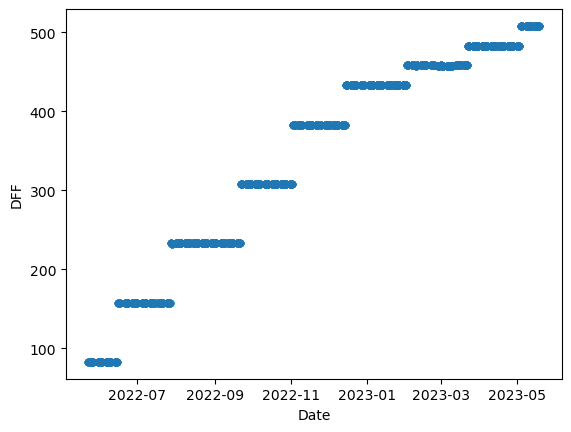

In [60]:
smalldf.plot.scatter('Date', 'DFF');

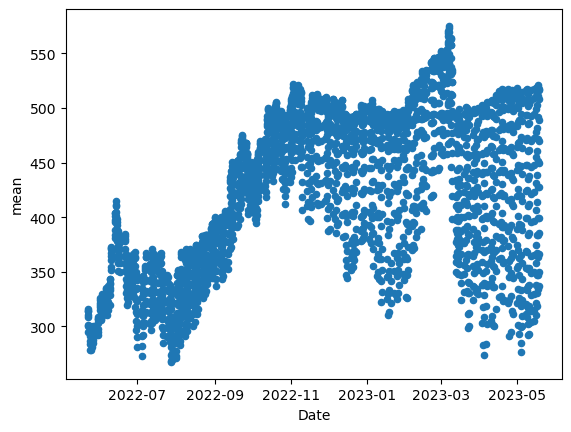

In [61]:
smalldf.plot.scatter('Date', 'mean');

In [62]:
new_df = df.pivot(index='Date', columns='contract', values='mean')

new_df = new_df.join(ffr.set_index('Date'), on='Date')

In [63]:
[i for i in new_df.columns if i != 'DFF']

[Timestamp('2023-02-01 00:00:00'),
 Timestamp('2023-03-22 00:00:00'),
 Timestamp('2023-05-03 00:00:00'),
 Timestamp('2023-06-14 00:00:00'),
 Timestamp('2023-07-26 00:00:00'),
 Timestamp('2023-09-20 00:00:00'),
 Timestamp('2023-11-01 00:00:00'),
 Timestamp('2023-12-13 00:00:00'),
 Timestamp('2024-01-31 00:00:00'),
 Timestamp('2024-03-20 00:00:00'),
 Timestamp('2024-05-01 00:00:00'),
 Timestamp('2024-06-19 00:00:00'),
 Timestamp('2024-07-31 00:00:00'),
 Timestamp('2024-09-25 00:00:00'),
 Timestamp('2024-11-06 00:00:00')]

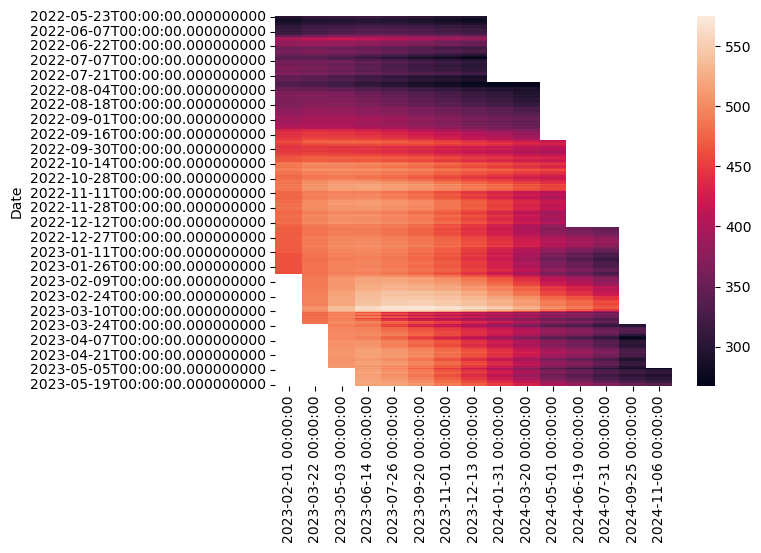

In [64]:
import seaborn as sns
sns.heatmap(new_df[[i for i in new_df.columns if i != 'DFF']]);

In [65]:
import plotly.graph_objects as go

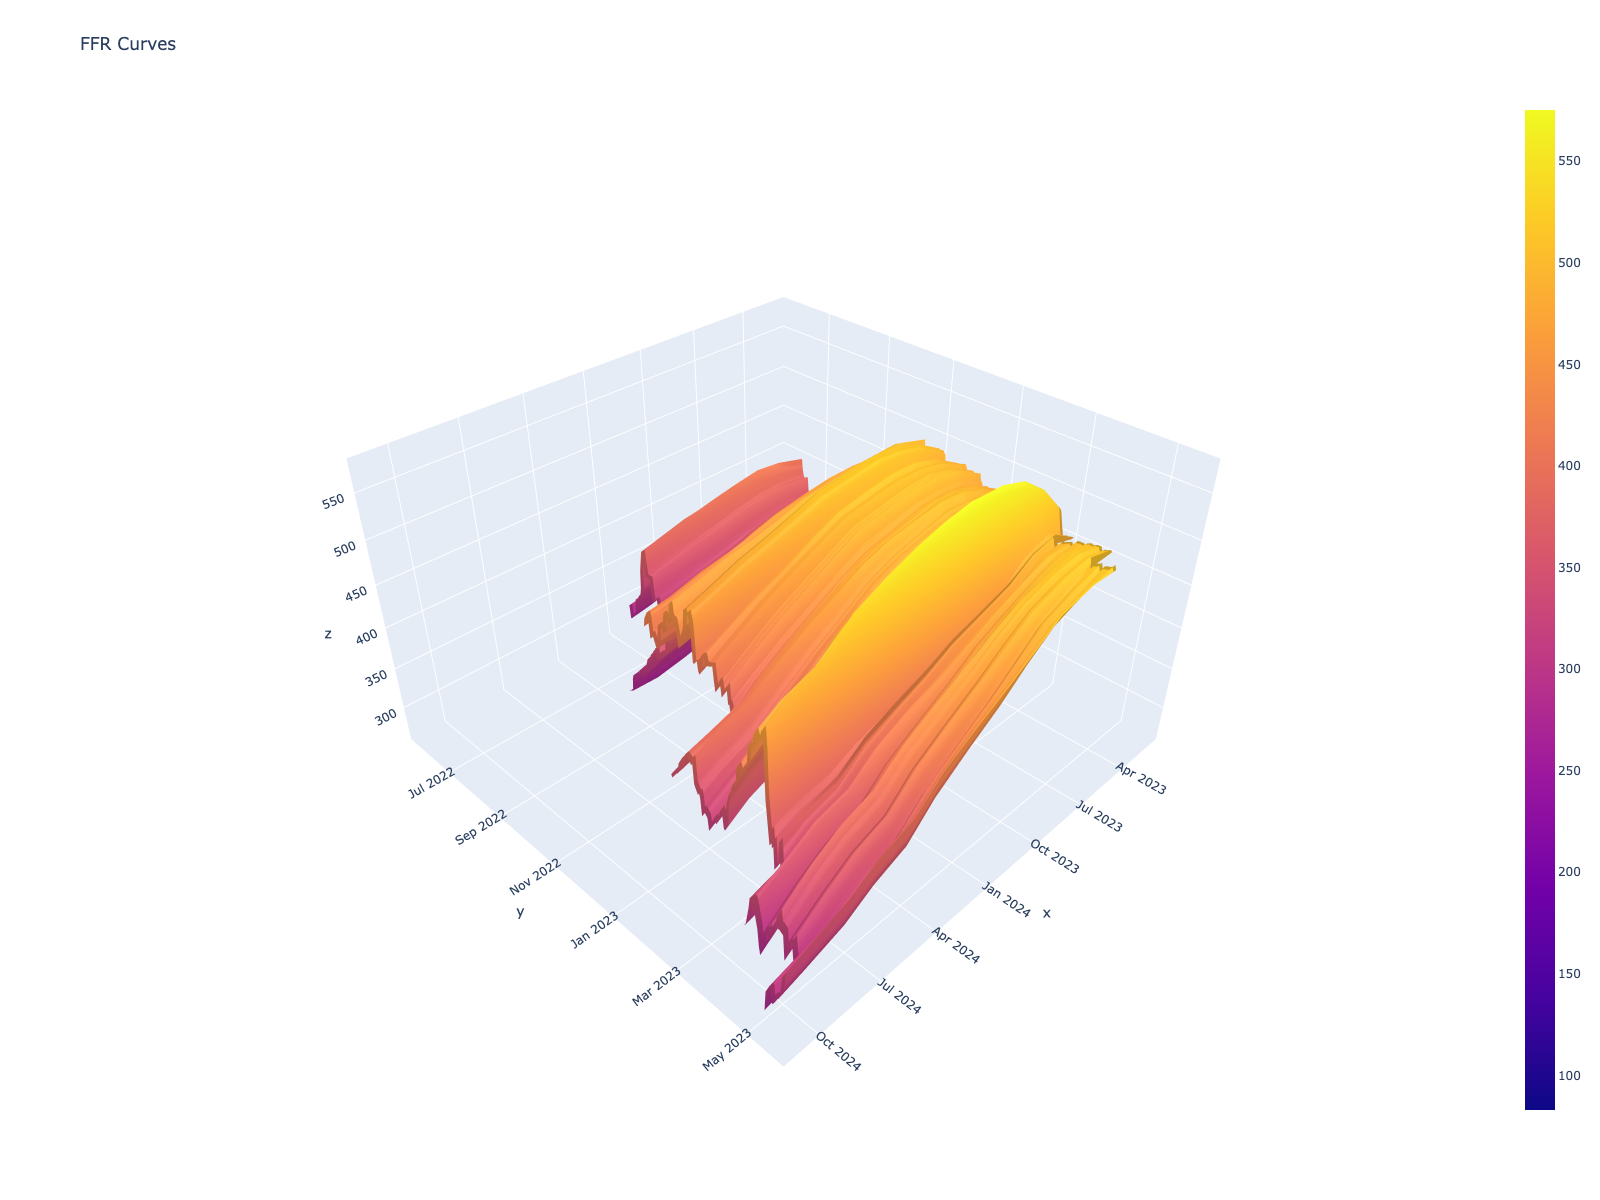

In [66]:
x = [i for i in new_df.columns if i != 'DFF']
y = new_df.index
z = new_df.to_numpy()

fig = go.Figure(data=[go.Surface(z=z, x=x, y=y)])
fig.update_layout(title='FFR Curves',
                  width = 1200,
                  height = 1200,
                  scene = {"aspectratio": {"x": 1, "y": 1, "z": .6}})
fig.update_coloraxes(cauto=True)
#fig.update_coloraxes(cmax=2000)
#fig.update_coloraxes(cmin=2000)
fig.show()

# Cohorting

In [67]:
contractvals = sorted(list({i for i in df.contract}))

In [68]:
contractvals

[Timestamp('2023-02-01 00:00:00'),
 Timestamp('2023-03-22 00:00:00'),
 Timestamp('2023-05-03 00:00:00'),
 Timestamp('2023-06-14 00:00:00'),
 Timestamp('2023-07-26 00:00:00'),
 Timestamp('2023-09-20 00:00:00'),
 Timestamp('2023-11-01 00:00:00'),
 Timestamp('2023-12-13 00:00:00'),
 Timestamp('2024-01-31 00:00:00'),
 Timestamp('2024-03-20 00:00:00'),
 Timestamp('2024-05-01 00:00:00'),
 Timestamp('2024-06-19 00:00:00'),
 Timestamp('2024-07-31 00:00:00'),
 Timestamp('2024-09-25 00:00:00'),
 Timestamp('2024-11-06 00:00:00')]

In [69]:
smalldf2 = smalldf
smalldf2['dtm'] = (smalldf2.contract - smalldf2.Date)

In [70]:
smalldf2

Date   contract    DFF       btcopen    btcvolume        mean  \
0  2022-05-23 2023-02-01   83.0  30309.396484  31483454557  301.096713   
1  2022-05-24 2023-02-01   83.0  29101.125000  26616506245  286.983550   
2  2022-05-25 2023-02-01   83.0  29653.134766  27525063551  286.941637   
3  2022-05-26 2023-02-01   83.0  29564.777344  36774325352  286.940825   
4  2022-05-27 2023-02-01   83.0  29251.140625  36582005748  287.131538   
..        ...        ...    ...           ...          ...         ...   
7  2023-05-15 2024-11-06  508.0  26931.384766  14413231792  304.650725   
8  2023-05-16 2024-11-06  508.0  27171.513672  12732238816  310.291212   
9  2023-05-17 2024-11-06  508.0  27035.470703  15140006925  318.427600   
10 2023-05-18 2024-11-06  508.0  27401.650391  15222938600  334.447162   
11 2023-05-19 2024-11-06  508.0  26826.753906  11258983301  337.358525   

        dtm  
0  254 days  
1  253 days  
2  252 days  
3  251 days  
4  250 days  
..      ...  
7  541 days  
8  540 days  
9  539 days  
10 538 days  
11 537 days  

[2705 rows x 7 columns]

In [71]:
from datetime import datetime
smalldf2.dtm = smalldf2.dtm.dt.days

In [72]:
smalldf2.dtm

0     254
1     253
2     252
3     251
4     250
     ... 
7     541
8     540
9     539
10    538
11    537
Name: dtm, Length: 2705, dtype: int64

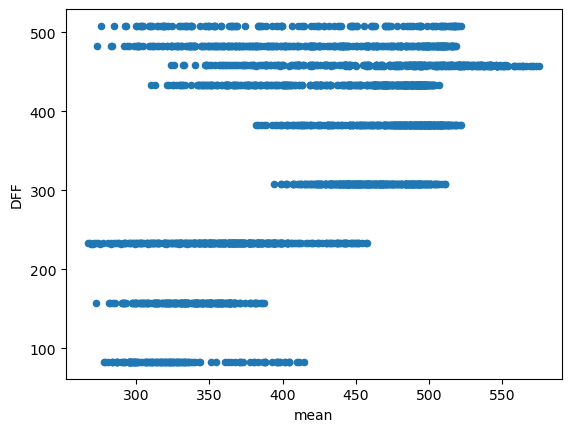

In [73]:
# useless
smalldf.plot.scatter('mean', 'DFF');

In [74]:
smalldf2['diff'] = smalldf2['mean'] - smalldf2.DFF

In [75]:
smalldf2

Date   contract    DFF       btcopen    btcvolume        mean  dtm  \
0  2022-05-23 2023-02-01   83.0  30309.396484  31483454557  301.096713  254   
1  2022-05-24 2023-02-01   83.0  29101.125000  26616506245  286.983550  253   
2  2022-05-25 2023-02-01   83.0  29653.134766  27525063551  286.941637  252   
3  2022-05-26 2023-02-01   83.0  29564.777344  36774325352  286.940825  251   
4  2022-05-27 2023-02-01   83.0  29251.140625  36582005748  287.131538  250   
..        ...        ...    ...           ...          ...         ...  ...   
7  2023-05-15 2024-11-06  508.0  26931.384766  14413231792  304.650725  541   
8  2023-05-16 2024-11-06  508.0  27171.513672  12732238816  310.291212  540   
9  2023-05-17 2024-11-06  508.0  27035.470703  15140006925  318.427600  539   
10 2023-05-18 2024-11-06  508.0  27401.650391  15222938600  334.447162  538   
11 2023-05-19 2024-11-06  508.0  26826.753906  11258983301  337.358525  537   

          diff  
0   218.096713  
1   203.983550  
2   203.941637  
3   203.940825  
4   204.131538  
..         ...  
7  -203.349275  
8  -197.708788  
9  -189.572400  
10 -173.552838  
11 -170.641475  

[2705 rows x 8 columns]

In [76]:
smalldf2.dtypes

Date         datetime64[ns]
contract     datetime64[ns]
DFF                 float64
btcopen             float64
btcvolume             int64
mean                float64
dtm                   int64
diff                float64
dtype: object

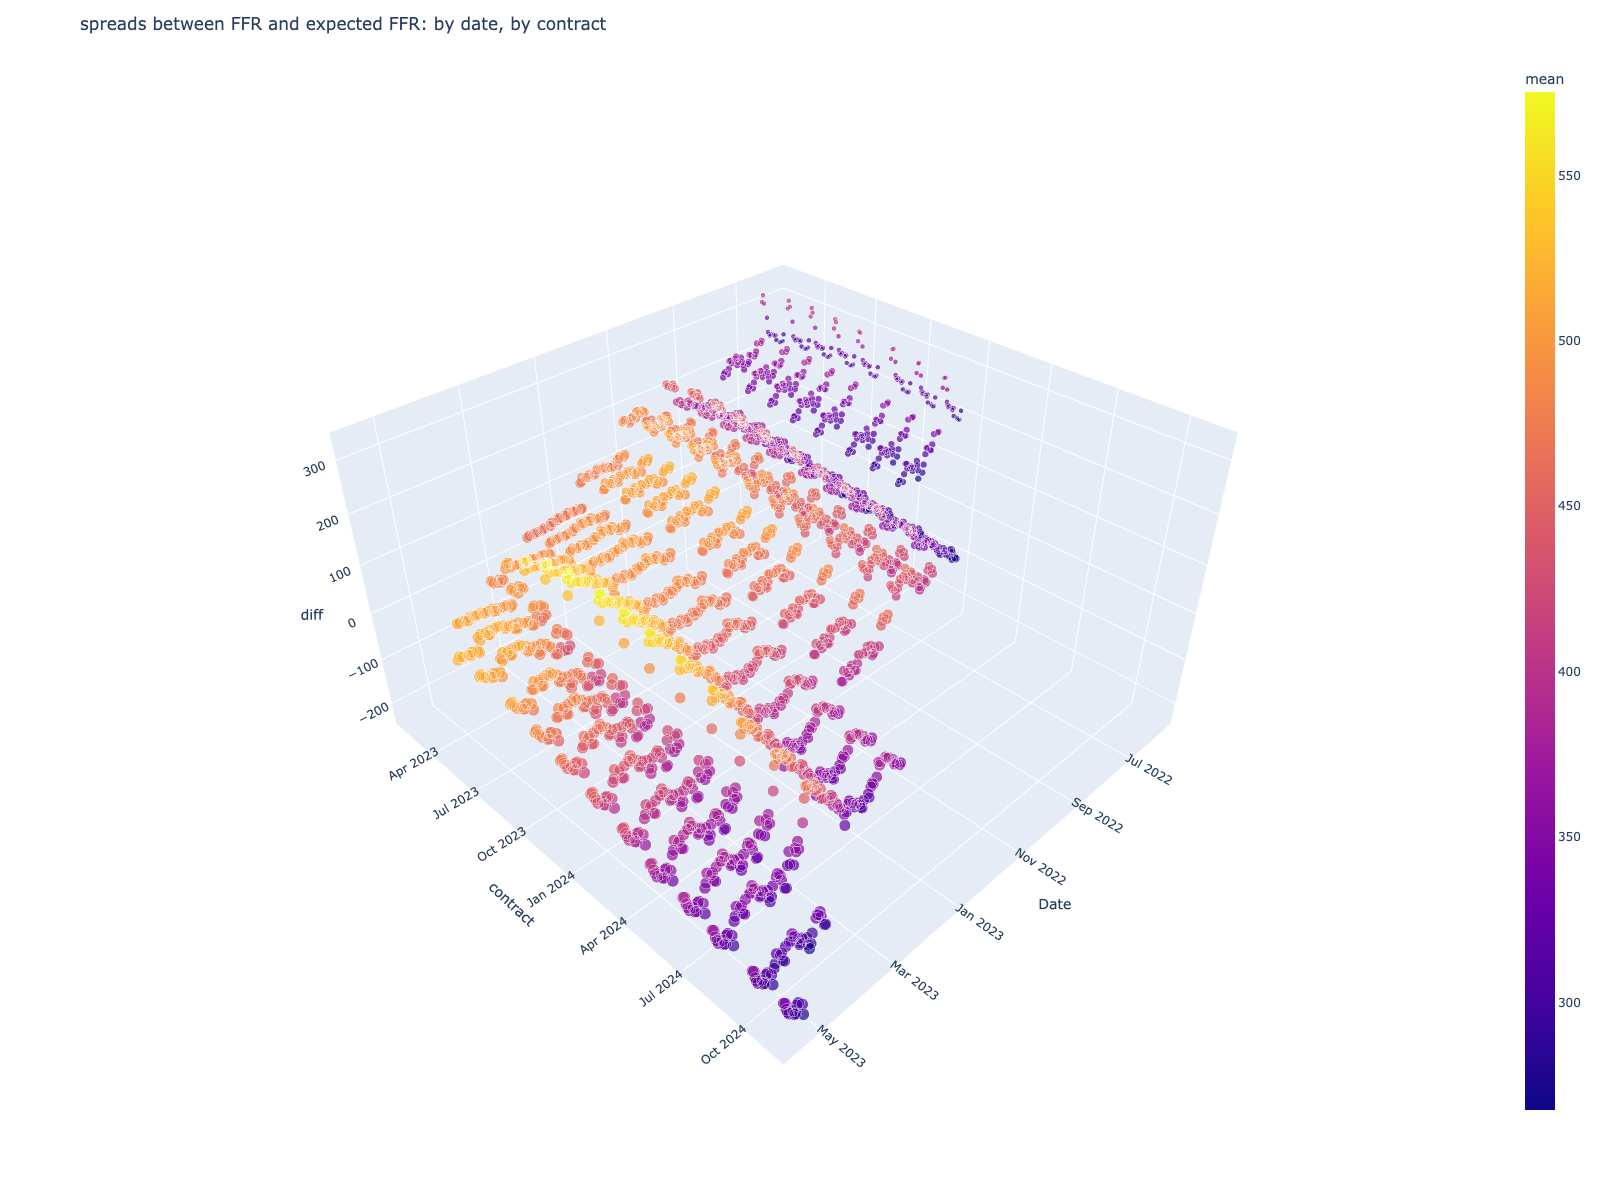

In [77]:

import plotly.express as px
fig = px.scatter_3d(smalldf2, x='Date', y='contract', z='diff', color='mean', size='DFF')
fig.update_layout(title='spreads between FFR and expected FFR: by date, by contract',
                  width = 1200,
                  height = 1200,
                  scene = {"aspectratio": {"x": 1, "y": 1, "z": .6}})
fig.update_coloraxes(cauto=True)
fig.show()

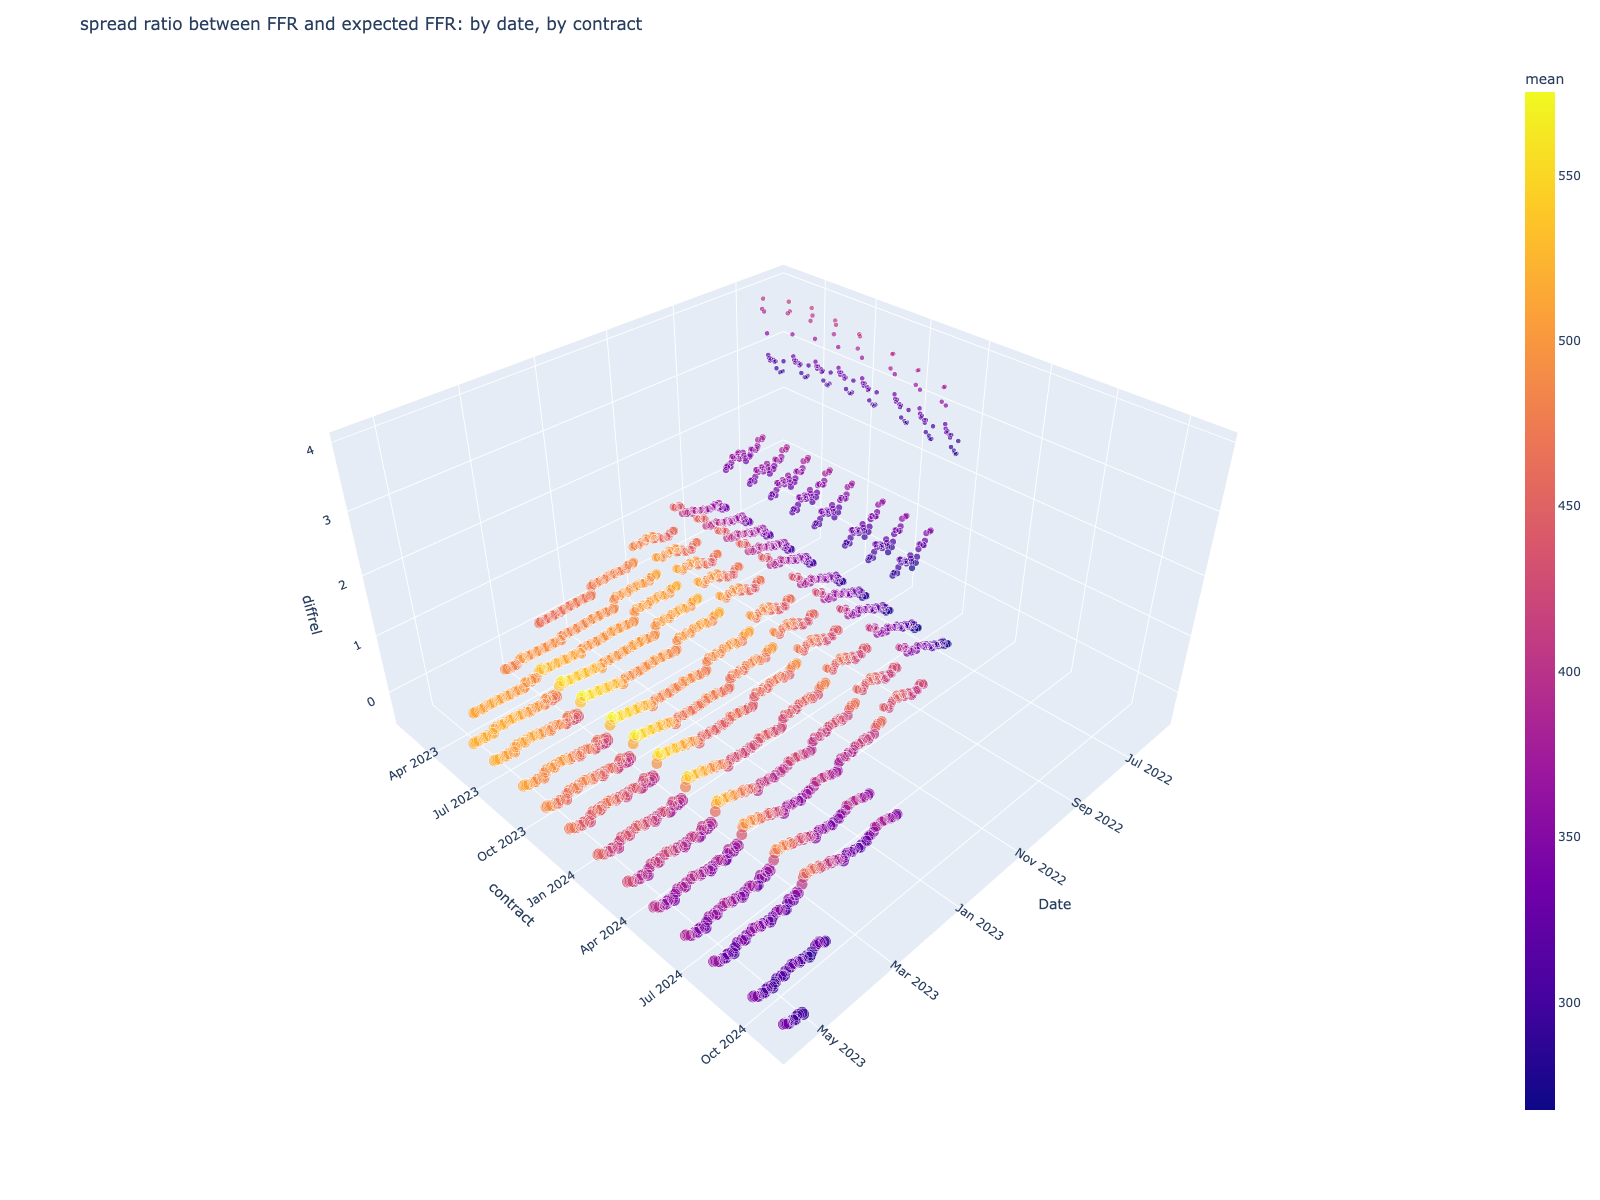

In [107]:

import plotly.express as px
fig = px.scatter_3d(smalldf2, x='Date', y='contract', z='diffrel', color='mean', size='DFF')
fig.update_layout(title='spread ratio between FFR and expected FFR: by date, by contract',
                  width = 1200,
                  height = 1200,
                  scene = {"aspectratio": {"x": 1, "y": 1, "z": .6}})
fig.update_coloraxes(cauto=True)
fig.show()

In [108]:
smalldf2['diffpct'] = (smalldf2['mean'] - smalldf2['DFF']) / smalldf2['DFF']

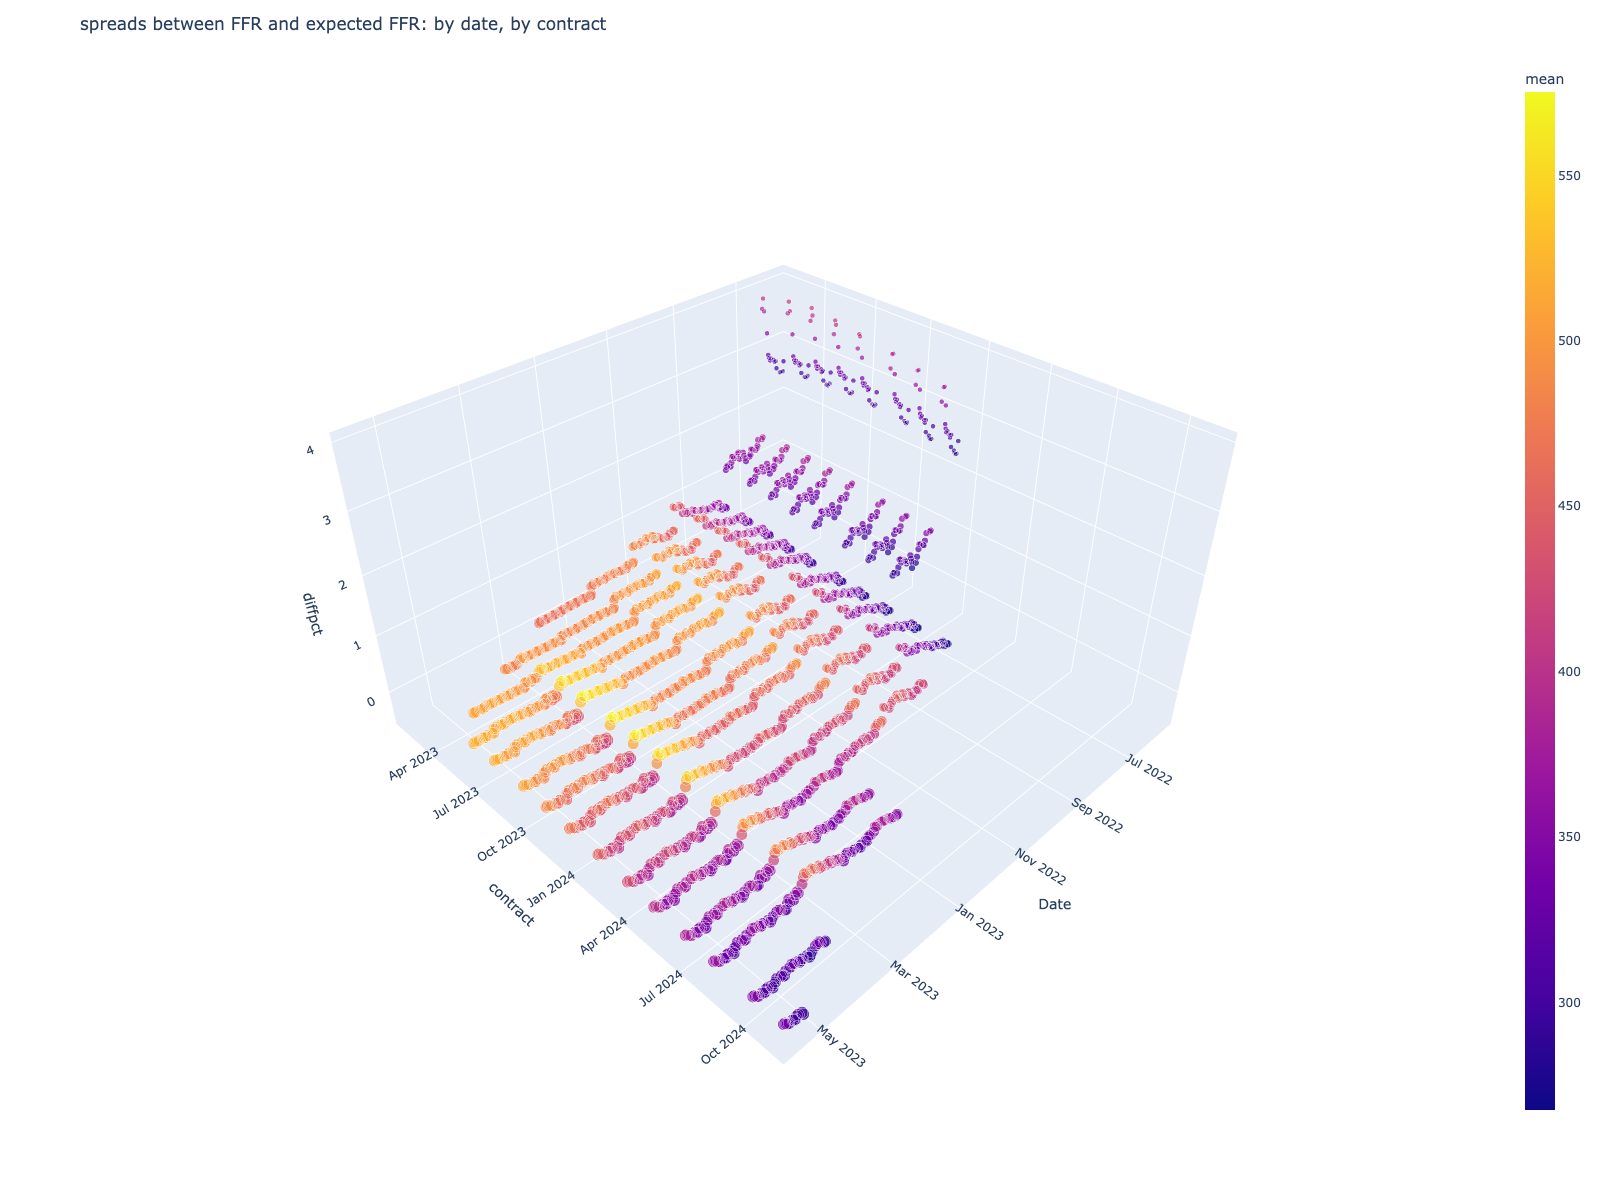

In [110]:

import plotly.express as px
fig = px.scatter_3d(smalldf2, x='Date', y='contract', z='diffpct', color='mean', size='DFF')
fig.update_layout(title='spreads between FFR and expected FFR: by date, by contract',
                  width = 1200,
                  height = 1200,
                  scene = {"aspectratio": {"x": 1, "y": 1, "z": .6}})
fig.update_coloraxes(cauto=True)
fig.show()

In [78]:
# premium if you're buying the contract (more time you have (orange and yellow) premium for cost of time when you don't know future rates)

In [79]:
smalldf2.Date.dtype

dtype('<M8[ns]')

In [80]:
smalldf3 = smalldf2

In [81]:
smalldf3

Date   contract    DFF       btcopen    btcvolume        mean  dtm  \
0  2022-05-23 2023-02-01   83.0  30309.396484  31483454557  301.096713  254   
1  2022-05-24 2023-02-01   83.0  29101.125000  26616506245  286.983550  253   
2  2022-05-25 2023-02-01   83.0  29653.134766  27525063551  286.941637  252   
3  2022-05-26 2023-02-01   83.0  29564.777344  36774325352  286.940825  251   
4  2022-05-27 2023-02-01   83.0  29251.140625  36582005748  287.131538  250   
..        ...        ...    ...           ...          ...         ...  ...   
7  2023-05-15 2024-11-06  508.0  26931.384766  14413231792  304.650725  541   
8  2023-05-16 2024-11-06  508.0  27171.513672  12732238816  310.291212  540   
9  2023-05-17 2024-11-06  508.0  27035.470703  15140006925  318.427600  539   
10 2023-05-18 2024-11-06  508.0  27401.650391  15222938600  334.447162  538   
11 2023-05-19 2024-11-06  508.0  26826.753906  11258983301  337.358525  537   

          diff  
0   218.096713  
1   203.983550  
2   203.941637  
3   203.940825  
4   204.131538  
..         ...  
7  -203.349275  
8  -197.708788  
9  -189.572400  
10 -173.552838  
11 -170.641475  

[2705 rows x 8 columns]

In [82]:
smalldf3

Date   contract    DFF       btcopen    btcvolume        mean  dtm  \
0  2022-05-23 2023-02-01   83.0  30309.396484  31483454557  301.096713  254   
1  2022-05-24 2023-02-01   83.0  29101.125000  26616506245  286.983550  253   
2  2022-05-25 2023-02-01   83.0  29653.134766  27525063551  286.941637  252   
3  2022-05-26 2023-02-01   83.0  29564.777344  36774325352  286.940825  251   
4  2022-05-27 2023-02-01   83.0  29251.140625  36582005748  287.131538  250   
..        ...        ...    ...           ...          ...         ...  ...   
7  2023-05-15 2024-11-06  508.0  26931.384766  14413231792  304.650725  541   
8  2023-05-16 2024-11-06  508.0  27171.513672  12732238816  310.291212  540   
9  2023-05-17 2024-11-06  508.0  27035.470703  15140006925  318.427600  539   
10 2023-05-18 2024-11-06  508.0  27401.650391  15222938600  334.447162  538   
11 2023-05-19 2024-11-06  508.0  26826.753906  11258983301  337.358525  537   

          diff  
0   218.096713  
1   203.983550  
2   203.941637  
3   203.940825  
4   204.131538  
..         ...  
7  -203.349275  
8  -197.708788  
9  -189.572400  
10 -173.552838  
11 -170.641475  

[2705 rows x 8 columns]

In [83]:
smalldf3['diffrel'] = (smalldf3['mean'] - smalldf3['DFF'])/smalldf3['DFF']
smalldf3.diffrel = smalldf3.diffrel.round(3)

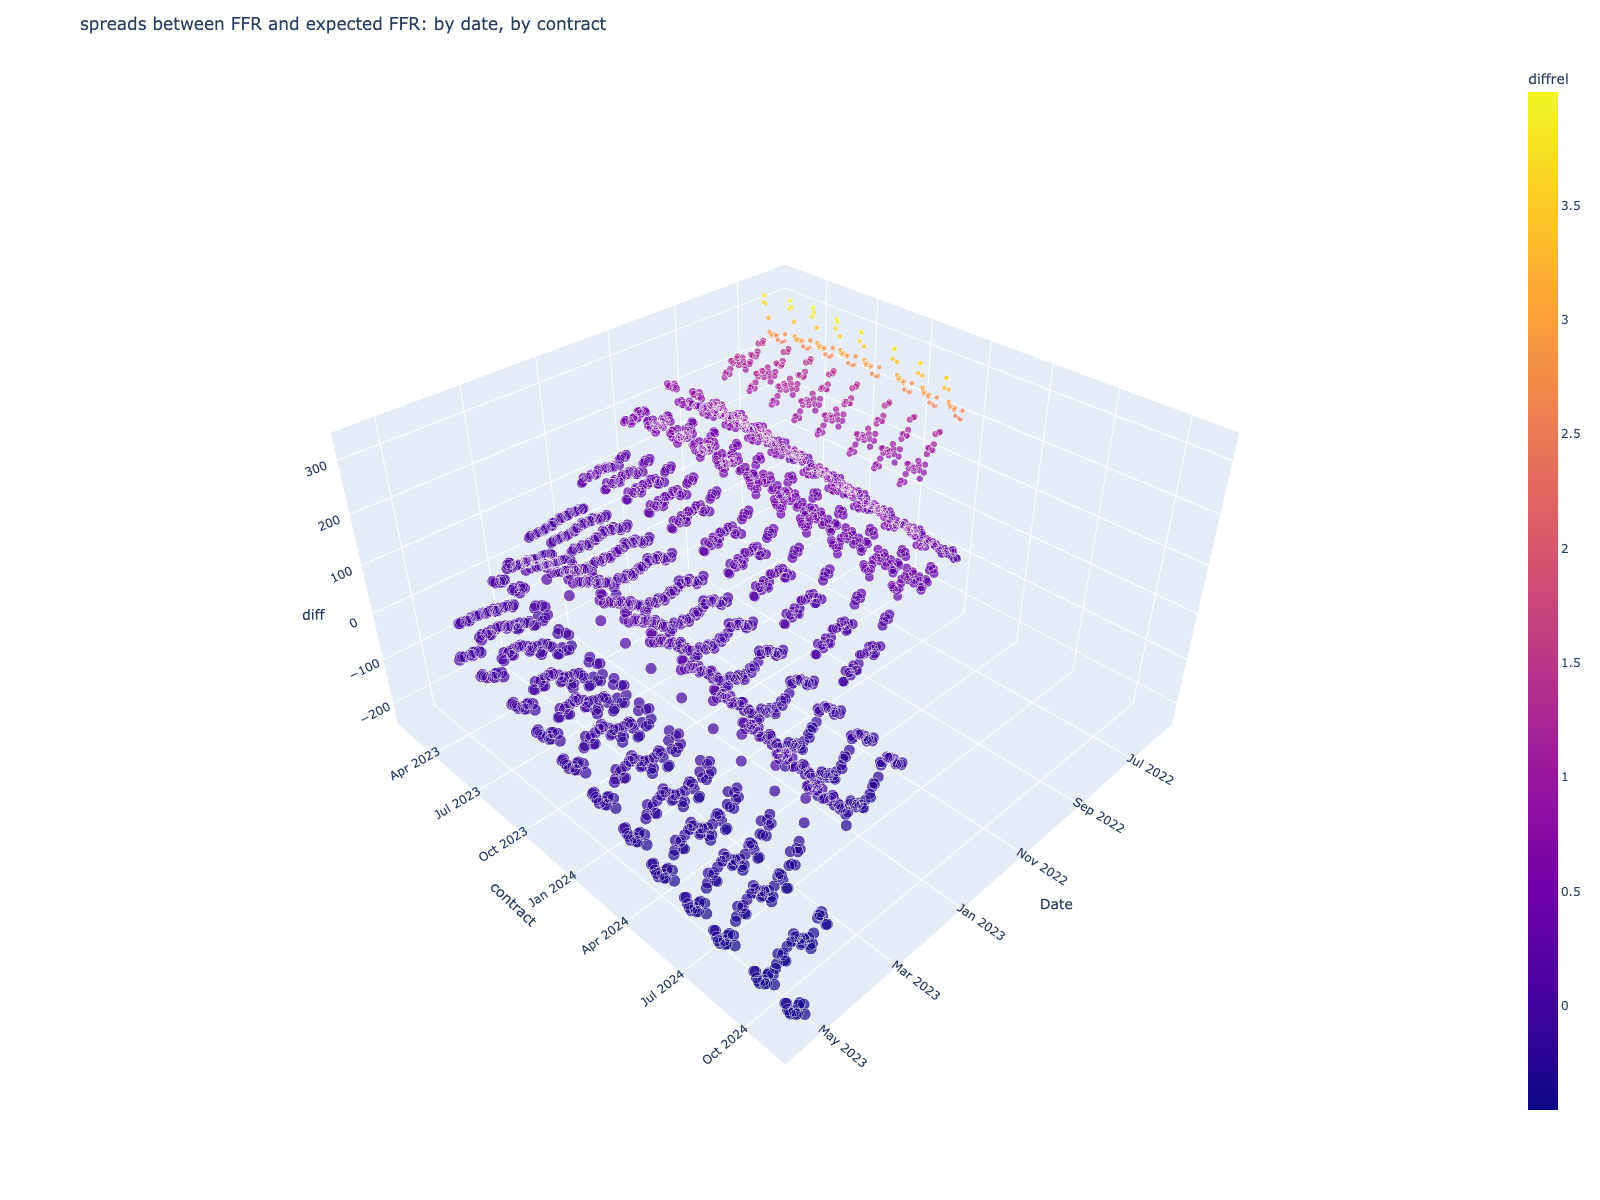

In [84]:

import plotly.express as px
fig = px.scatter_3d(smalldf2, x='Date', y='contract', z='diff', color='diffrel', size='DFF')
fig.update_layout(title='spreads between FFR and expected FFR: by date, by contract',
                  width = 1200,
                  height = 1200,
                  scene = {"aspectratio": {"x": 1, "y": 1, "z": .6}})
fig.update_coloraxes(cauto=True)
fig.show()

# Timeseries

In [85]:
def plot_series(df, cols=None, title='Title', xlab=None, ylab=None, steps=1):
    
    # Set figure size to be (18, 9).
    plt.figure(figsize=(18,9))
    legend_list = []
    
    # Iterate through each column name.
    for col in cols:
            
        # Generate a line plot of the column name.
        # You only have to specify Y, since our
        # index will be a datetime index.
        plt.plot(smalldf2[col])
        legend_list.append(col)
        
    # Generate title and labels.
    plt.title(title, fontsize=26)
    plt.xlabel(xlab, fontsize=20)
    plt.ylabel(ylab, fontsize=20)
    
    # Enlarge tick marks.
    plt.yticks(fontsize=18)
    plt.xticks(df.index[0::steps], fontsize=18)
    
    plt.legend(legend_list);

In [86]:
'''plot_series(smalldf2,
            ['btcopen'],
            title=" price",
            steps=50)
'''

'plot_series(smalldf2,\n            [\'btcopen\'],\n            title=" price",\n            steps=50)\n'

# Dickey Fuller

In [87]:
def interpret_dftest(dftest):
    dfoutput = pd.Series(dftest[0:3], index=['Test Statistic','p-value', 'Lag Used'])
    return dfoutput

In [88]:
interpret_dftest(adfuller(smalldf2['btcopen']))

Test Statistic    -5.312577
p-value            0.000005
Lag Used          25.000000
dtype: float64

# Regressions
This LR is just a placeholder, i don't respect the methodology

In [89]:
smalldf2

Date   contract    DFF       btcopen    btcvolume        mean  dtm  \
0  2022-05-23 2023-02-01   83.0  30309.396484  31483454557  301.096713  254   
1  2022-05-24 2023-02-01   83.0  29101.125000  26616506245  286.983550  253   
2  2022-05-25 2023-02-01   83.0  29653.134766  27525063551  286.941637  252   
3  2022-05-26 2023-02-01   83.0  29564.777344  36774325352  286.940825  251   
4  2022-05-27 2023-02-01   83.0  29251.140625  36582005748  287.131538  250   
..        ...        ...    ...           ...          ...         ...  ...   
7  2023-05-15 2024-11-06  508.0  26931.384766  14413231792  304.650725  541   
8  2023-05-16 2024-11-06  508.0  27171.513672  12732238816  310.291212  540   
9  2023-05-17 2024-11-06  508.0  27035.470703  15140006925  318.427600  539   
10 2023-05-18 2024-11-06  508.0  27401.650391  15222938600  334.447162  538   
11 2023-05-19 2024-11-06  508.0  26826.753906  11258983301  337.358525  537   

          diff  diffrel  
0   218.096713    2.628  
1   203.983550    2.458  
2   203.941637    2.457  
3   203.940825    2.457  
4   204.131538    2.459  
..         ...      ...  
7  -203.349275   -0.400  
8  -197.708788   -0.389  
9  -189.572400   -0.373  
10 -173.552838   -0.342  
11 -170.641475   -0.336  

[2705 rows x 9 columns]

In [90]:
dummies = ['contract']

In [91]:
smalldf3 = pd.get_dummies(data = smalldf2, columns = dummies, drop_first = True)

In [92]:
xvars = [i for i in smalldf3.columns if i != 'btcopen' and i != 'Date']

In [93]:
X = smalldf3[xvars]
y = smalldf3['btcopen']

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [95]:
X_train = X[:2493]
X_test = X[2494:]
y_train = y[:2493]
y_test = y[2494:]

In [96]:
lr = LinearRegression()

lr.fit(X_train, y_train)
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

0.7260311706142808
-139.4723280949834


<class 'pandas.core.series.Series'> <class 'pandas.core.series.Series'> <class 'numpy.ndarray'>


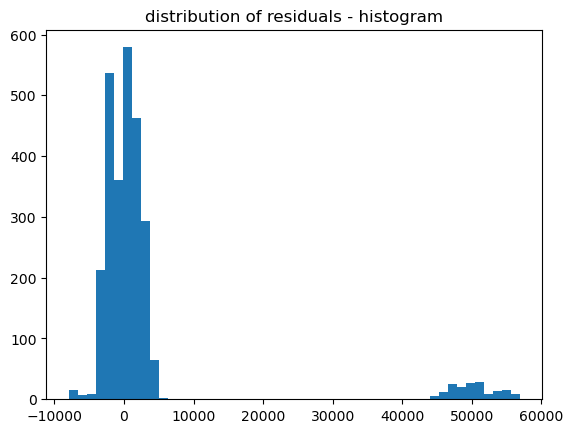

In [97]:
yhat = lr.predict(X)

residuals = y - yhat

plt.hist(residuals, bins = 50);
plt.title('distribution of residuals - histogram');
#residuals are.... kind of normal, mean is not 0

print(type(y), type(residuals), type(yhat))

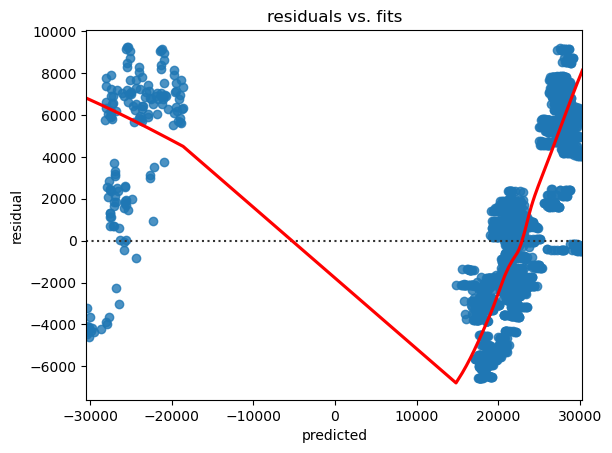

In [98]:
sns.residplot(x = yhat,
              y = residuals,
              lowess = True, 
              line_kws = {'color':'red'})\
    .set(title = 'residuals vs. fits',
        xlabel = 'predicted',
        ylabel = 'residual');

# hmm

In [99]:
# This is crazy what is up

In [100]:
smalldf2['yhat'] = yhat
smalldf2['residual'] = residuals

In [101]:
# what the hell is this

smalldf2[smalldf2.residual > 40000].sort_values(by = 'residual', ascending = False)

Date   contract    DFF       btcopen    btcvolume        mean  dtm  \
1  2023-05-05 2024-11-06  508.0  28851.480469  17936566518  300.703313  551   
2  2023-05-08 2024-11-06  508.0  28450.457031  19122903752  311.196462  548   
0  2023-05-04 2024-11-06  508.0  29031.304688  15548678514  276.192325  552   
19 2023-04-19 2024-09-25  483.0  30394.187500  24571565421  337.000962  525   
17 2023-04-17 2024-09-25  483.0  30317.146484  17872186762  326.999762  527   
..        ...        ...    ...           ...          ...         ...  ...   
17 2023-01-11 2024-07-31  433.0  17446.359375  18372283782  343.250700  567   
15 2023-01-09 2024-07-31  433.0  17093.992188  18624736866  345.748888  569   
57 2023-03-10 2024-07-31  457.0  20367.001953  39578257695  398.059250  509   
18 2023-01-12 2024-07-31  433.0  18117.593750  34971338710  322.250050  566   
58 2023-03-13 2024-07-31  458.0  22156.406250  49466362688  349.738100  506   

          diff  diffrel          yhat      residual  
1  -207.296687   -0.408 -28050.005081  56901.485550  
2  -196.803538   -0.387 -28085.322162  56535.779193  
0  -231.807675   -0.456 -27377.229745  56408.534432  
19 -145.999038   -0.302 -25507.886423  55902.073923  
17 -156.000238   -0.323 -25566.231786  55883.378271  
..         ...      ...           ...           ...  
17  -89.749300   -0.207 -27705.787717  45152.147092  
15  -87.251112   -0.202 -27975.031178  45069.023365  
57  -58.940750   -0.129 -24420.765829  44787.767782  
18 -110.749950   -0.256 -26401.795548  44519.389298  
58 -108.261900   -0.236 -22246.399668  44402.805918  

[162 rows x 11 columns]